# Recession Predictor Part 1

The United States as of today (October, 2019) has experienced the longest expansion cycle, yet the there are constant talks in the news about an impending recession. Yes, there are signs, such as the recent yield curve inversion, the market corrections in 2018 & 2019, etc. Recessions happen every 10 years or so, are we overdue for one?

Explain other methodologies used to predict recession.
*Federal Reserve
*Rabobank
*Blah
*Blah

Explain what I'm trying to do, not only to look at recession as a binary as NBER describes it, but also to predict future GDP in the [] futre terms.

For decision variable, we will two methods:
1. Predicting GDP growth.
2. Predicting probability of a recession.

## Feature Selection

Feature selection is important, as the rule of "garbage in, garbage out" applies. While there are techniques and algorithms to systematically select variables, this is outside the scope of this analysis.Instead, we will rely on domain knowledge to quickly select desired feastures. The following factors are considered when selecting input indicator variables:
* Having sufficient data, as recessions are rare occurances.
* Having forward predictive power, which means inflection changes should lead or occur simultaneously as inflection changes in GDP.
* Represent various aspects and mechanisms of the economy, such as a risk free benchmark, or inflation.
* Avoid composite models or indices. The goal is to construct our own model.

For the GDP decision variable:
* [**Real Gross Domestic Product**](https://fred.stlouisfed.org/series/GDPC1)- Inflation adjusted value of goods and services produced in a year.

For equities, the following variables are considered:
* [S&P 500](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC)- Weighted stock index of 500 companies listed on US exchanges with the largest market cap.
* [S&P 500 Cyclically Adjusted PE Ratio](https://www.quandl.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-Shiller-PE-Ratio-by-Month) [(info)](https://www.investopedia.com/terms/c/cape-ratio.asp)- Normalizes PE ratio fluctuations over 10 year inflation-adjusted earnings. This indicator is used to gauge whether the equities market is over or under-valued.
* [**Nonfinancial Corporate Debt as Percentage of Equity**](https://fred.stlouisfed.org/series/NCBCMDPMVCE)- Contains companies not in the S&P 500. Although this indicator excludes [% of GDP](), valuations of financial and noncorporate companies 

For bonds, the following variables are considered: 
* [10 Year Constant Maturity Minus 3 Month Treasuries Yield Spread](https://fred.stlouisfed.org/series/T10Y3M)- Federal Reserve's main methodology. Financial institutions borrow at low rates short term, to lend at high rates long term. High spread means  The data only goes back to 1982, which is not enough to train this model.
* [**10 Year Constant Maturity Minus 3 Month Treasuries Secondary Market Yield Spread**](https://fred.stlouisfed.org/series/TB3MS)- Makes up for the lack of data in the primary market. Primary and secondary market spreads are very close today, due to electronic trading. However, the spread has been higher historically. This discrepancy is mostly caused by information inefficiency. Federal Reserve also [manipulates rates to some degree](https://fredblog.stlouisfed.org/2017/02/lets-do-the-twist/). Since this model relies on multiple input indicators, this flaw can be overlooked. 
* [10 Year Treasuries Constant Maturity Rate](https://fred.stlouisfed.org/series/DGS10)- Long term treasuries usually reflect investor sentiment regarding long term economic growth, with higher yield . This does not provide strong evidence of liquidity.
* 3 Months Outstanding Repo [(info)](http://law.emory.edu/ecgar/content/volume-5/issue-2/essays/repo-recession-financial-regulation.html)- Hard to find on the web. Before the Great Recession, investment banks used short term repo to inject liquidity to stay afloat. Uptick in short term repo may indicate credit crunch. FRED only has records of contracts with itself as a participant, leaving out the majority of transactions.

For inflation, the following indicators are considered:
* [**Consumer Price Index for Urban Consumers**](https://fred.stlouisfed.org/series/CPIAUCSL) [(info)](https://www.bls.gov/opub/btn/volume-3/why-does-bls-provide-both-the-cpi-w-and-cpi-u.htm)- Price inflation covering 88% of Americans, calculated from expenditures. Uses a survey to calculate the basket of goods and services. Basket is updated every 2 years. Selected due to difficulty quantifying intangible traits such as quality.
* [Chained Consumper Price Index for Urban Consumers](https://fred.stlouisfed.org/series/SUUR0000SA0) [(info)](https://www.brookings.edu/blog/up-front/2017/12/07/the-hutchins-center-explains-the-chained-cpi/)- Lacking long term data. Similar to CPI-U, but considers substitution purchases, and weights the changes every month.

For employment, the following indicators are considered:
* [Labor Participation Rate](https://fred.stlouisfed.org/series/CIVPART)- Percent of population over 16 actively seeking or engaged in employment. Too macro driven, such as women participation in the workforce, or retirement of Baby Boomers.
* [**Total Nonfarm Payroll**](https://fred.stlouisfed.org/series/PAYEMS)- Accounts for 80% of workers who contribute to GDP, excluding propritors, unpaid volunteers, or farm workers.
* [Wage Growth](https://fred.stlouisfed.org/series/CES0500000003)- Lack of long term data.

Lastly, the following indicators are not placed in any categories above, but are included because of their predictive power.
* [**Real Private Gross Investment**](https://fred.stlouisfed.org/series/GPDIC1)- Investment represents expenditure on capital goods and residential properties. Provides an indicator for future productivity and GDP growth. Also a strong sign of economic recovery.

The following indicators were considered, but ultimately dismissed.
* [Purchaing Managers' Index](https://www.instituteforsupplymanagement.org/ismreport/mfgrob.cfm?SSO=1)- Locked behind paywall. A survey of supply chain professionals in 19 primary industries.
* [Composite Index of Leading Indicators](https://www.conference-board.org/data/bcicountry.cfm?cid=1) [(info)](https://www.investopedia.com/terms/c/cili.asp)- Locked behind paywall. A composite index of 10 indicators.
* [Consumer Confidence Index](https://www.conference-board.org/data/consumerconfidence.cfm)- Locked behind paywall. A survey of consumer purchases and sentiments.
* [VIX Volativity Index](https://fred.stlouisfed.org/series/VIXCLS)- Describes the volatility, not the direction, of stocks. Also does not describe economic strength.
* [Effective Federal Funds Rate](https://fred.stlouisfed.org/series/FEDFUNDS)- Not an organic indicator of market conditions. Different FED chairs have different doctrines. The FED was fighting inflation in the 70s, deregulation in the 80s, inflation targeting in the 90s & 2000s, then quantitative easing in the 2010s. 
* Change in working hours- Symptom, not sign, of economic strength.
* [Personal Savings Rate](https://fred.stlouisfed.org/series/PSAVERT)- Too macro driven, such as women entering workforce, or retirement of Baby Boomers.
* Incremental Capital Outputs Ratio- Hard to find on the web. Calculates how much additional capital investment is needed to create growth.

## Data Preparation

First, import the necessary packages.

In [1]:
import fredapi
import numpy as np
import pandas as pd
import scipy as sp
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson
from copy import deepcopy

#### Import FRED Data

To import FRED data, we need an API key. API key can be requested [here](https://research.stlouisfed.org/docs/api/fred/).

In [2]:
f = fredapi.Fred(api_key='8b91217446b6307d20cb5e4fcfba70eb') # remove API when done

Data returned by fredapi module are in "series" format. We need to convert them to "dataframe" format.

We will also rename the columns so the data become easier to manipulate.

In [3]:
# monthly data.
tbill_3m = f.get_series('TB3MS').to_frame().reset_index().rename(columns={'index':'date', 0:'tbill_3m'})
tbill_10y = f.get_series('GS10').to_frame().reset_index().rename(columns={'index':'date', 0:'tbill_10y'})
cpiu = f.get_series('CPIAUCSL').to_frame().reset_index().rename(columns={'index':'date', 0:'cpiu'})
payroll = f.get_series('PAYEMS').to_frame().reset_index().rename(columns={'index':'date', 0:'payroll'})
# quarterly data
dtoe = f.get_series('NCBCMDPMVCE').to_frame().reset_index().rename(columns={'index':'date', 0:'dtoe'})
pinvest = f.get_series('GPDIC1').to_frame().reset_index().rename(columns={'index':'date', 0:'pinvest'})
gdp = f.get_series('GDPC1').to_frame().reset_index().rename(columns={'index':'date', 0:'gdp'})

In [4]:
print(type(tbill_3m))

<class 'pandas.core.frame.DataFrame'>


#### Setting Start Date

Note some data are monthly, while others are quarterly. They need to be dealt with separately.

Note that all variables have different startig dates.

In [5]:
print(tbill_3m.head(1))
print(tbill_10y.head(1))
print(cpiu.head(1))
print(payroll.head(1))
print(dtoe.head(1))
print(pinvest.head(1))
print(gdp.head(1))

        date  tbill_3m
0 1934-01-01      0.72
        date  tbill_10y
0 1953-04-01       2.83
        date   cpiu
0 1947-01-01  21.48
        date  payroll
0 1939-01-01  29923.0
        date       dtoe
0 1945-10-01  43.061963
        date  pinvest
0 1947-01-01  218.091
        date       gdp
0 1947-01-01  2033.061


Some also have null values in the middle.

In [6]:
print(dtoe.iloc[20:25,:])

         date       dtoe
20 1950-10-01  55.603398
21 1951-01-01        NaN
22 1951-04-01        NaN
23 1951-07-01        NaN
24 1951-10-01  53.423337


For consistency, we will set the starting date at 1953/4/1.

In [7]:
start_date = pd.to_datetime('1953, 4')
tbill_3m = tbill_3m[tbill_3m.iloc[:,0] >= start_date]
tbill_10y = tbill_10y[tbill_10y.iloc[:,0] >= start_date]
cpiu = cpiu[cpiu.iloc[:,0] >= start_date]
payroll = payroll[payroll.iloc[:,0] >= start_date]
pinvest = pinvest[pinvest.iloc[:,0] >= start_date]
dtoe = dtoe[dtoe.iloc[:,0] >= start_date]
gdp = gdp[gdp.iloc[:,0] >= start_date]

#### Returning Treasury Spread

In [8]:
tbill = [tbill_10y, tbill_3m]
tbill = reduce(lambda left,right: pd.merge(left,right,on='date'), tbill)
tbill = tbill.set_index('date')

tbill['tbill_10y'] = tbill.loc[:,'tbill_10y'] - tbill.loc[:,'tbill_3m']
tbill = tbill.drop('tbill_3m', axis=1)
tbill = tbill.rename(columns={'tbill_10y':'tbill'})

In [9]:
tbill.head()

,tbill
date,
1953-04-01,0.64
1953-05-01,0.89
1953-06-01,1.00
1953-07-01,0.89
1953-08-01,0.91


#### Converting Quarterly to Monthly Data and Null Value Interpolation

In [10]:
dtoe = dtoe.set_index('date').resample('MS').asfreq()
pinvest = pinvest.set_index('date').resample('MS').asfreq()
gdp = gdp.set_index('date').resample('MS').asfreq()

In [11]:
gdp.head(2)

,gdp
date,
1953-04-01,2718.709
1953-05-01,NaN


We will use [cublic spline interpolation](https://columbiaeconomics.com/2010/01/20/how-economists-convert-quarterly-data-into-monthly-cubic-spline-interpolation/), a technique commonly used by economists. Cubic spline has better smoothing over quadratic interpolation.

In [12]:
gdp = gdp['gdp'].interpolate(method='spline', order=3)
dtoe = dtoe['dtoe'].interpolate(method='spline', order=3)
pinvest = pinvest['pinvest'].interpolate(method='spline', order=3)

Interpolation converts data to series. We need to convert back to DataFrame type.

In [13]:
gdp = gdp.to_frame().reset_index()
dtoe = dtoe.to_frame().reset_index()
pinvest = pinvest.to_frame().reset_index()

## Preliminary Analysis

Join all variables into the one dataframe.

In [14]:
data = [tbill, cpiu, payroll, dtoe, pinvest, gdp]
data = reduce(lambda left,right: pd.merge(left,right,on='date'), data)
data = data.set_index('date')

data.tail(2)

,tbill,cpiu,payroll,dtoe,pinvest,gdp
date,,,,,,
2019-03-01,0.17,254.148,150796.0,31.722101,3451.579485,18995.539134
2019-04-01,0.15,254.958,151012.0,32.878620,3424.653000,19021.860000


In [15]:
data.isnull().sum()

tbill      0
cpiu       0
payroll    0
dtoe       0
pinvest    0
gdp        0
dtype: int64

In [16]:
data.describe()

,tbill,cpiu,payroll,dtoe,pinvest,gdp
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,1.477011,116.719218,98634.532156,53.329095,1389.299122,9204.323371
std,1.163736,75.631481,31731.058247,19.547286,925.362634,4910.707601
min,-2.650000,26.690000,48826.000000,27.607288,258.119250,2648.605266
25%,0.620000,37.300000,70792.000000,37.836569,586.052264,4938.967907
50%,1.450000,109.500000,99121.000000,45.748693,1143.195032,8185.303000
75%,2.410000,181.200000,130666.000000,67.745365,2223.919596,13559.032000
max,4.420000,254.958000,151012.000000,103.214216,3481.088000,19021.860000


/home/chrx/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


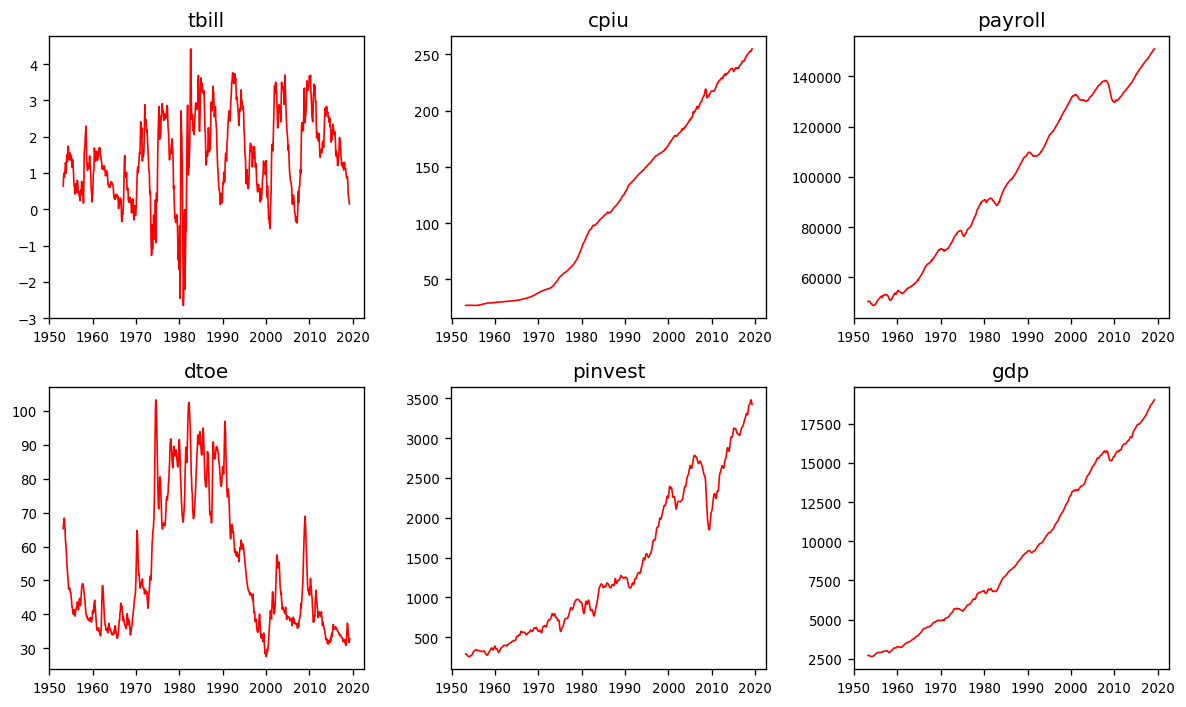

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=120, figsize=(10,6))
for col, ax in enumerate(axes.flatten()):
    ax.plot(data[data.columns[col]], color='red', linewidth=1)
    ax.set_title(data.columns[col])
    ax.tick_params(labelsize=8)
    
plt.tight_layout()

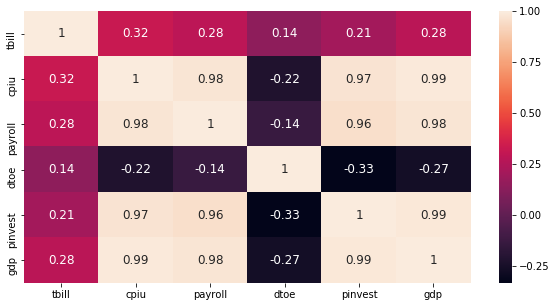

In [18]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(data.corr(), xticklabels=data.columns.values, yticklabels=data.columns.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

CPIU, PAYROLL, PINVEST, and GDP are highly correlated. This could create problems of multicollinearity. Multicollinearity reduces the statistical significance of the variables, making it difficult to pinpoint which variable is responsible for changes in GDP.

Going back to the criteria set at the beginning, CPIU and PAYROLL will be removed as PINVEST has the earliest inflection point.

In [19]:
data = data.drop(['cpiu', 'payroll'], axis=1)

#### Model Selection

For dealing with multiple variables, a vector autoregression (VAR) model is right for the job.

VAR assumes Granger causality relationship between all of the variables, in other words, all variables are dependent variables on each other. We can verify if we should reject this hypothesis.

#### Test for Autocorrelation

GDP is highly autocorrelated. While this feature can allow a strong generalization of GDP trend (2% year-over-year growth), we are interested in the short term fluctuations.

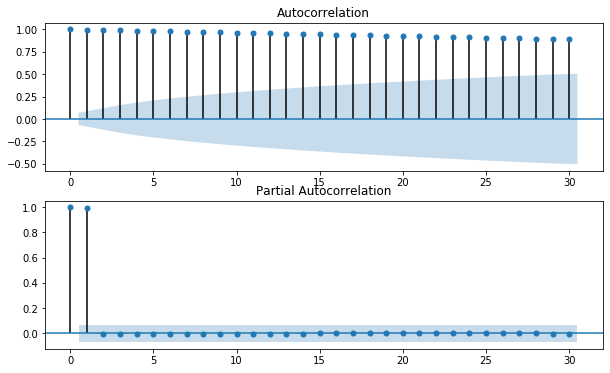

In [20]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(gdp.gdp, ax=ax[0])
ax[1] = plot_pacf(gdp.gdp, ax=ax[1])

#### Test for Stationarity

It is also important for all data to be stationary, meaning the mean and variance do not 

In [67]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries):

        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags','# Observations'])
        dfResults['Critical Value 5%'] = adfTest[4]['5%']

        print('Augmented Dickey-Fuller Test Results:')
        print(dfResults)

In [68]:
sTest = StationarityTests()

for var in data:
    sTest.ADF_Stationarity_Test(data[var])
    print('Is {} series stationary? {}'.format(var, sTest.isStationary))
    print('\n')

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -5.092447
P-Value                 0.000015
# Lags                 16.000000
# Observations        776.000000
Critical Value 5%      -2.865272
dtype: float64
Is tbill series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.121154
P-Value                 0.706563
# Lags                 21.000000
# Observations        771.000000
Critical Value 5%      -2.865296
dtype: float64
Is dtoe series stationary? False


Augmented Dickey-Fuller Test Results:
ADF Test Statistic      0.350306
P-Value                 0.979538
# Lags                 17.000000
# Observations        775.000000
Critical Value 5%      -2.865277
dtype: float64
Is pinvest series stationary? False


Augmented Dickey-Fuller Test Results:
ADF Test Statistic      2.634043
P-Value                 0.999081
# Lags                 19.000000
# Observations        773.000000
Critical Value 5%      -2.865286
dtype: float64
Is gdp series statio

#### Data Transformation

To make our data stationary, we will take the first difference of the log of the month(t) and its lag value. This is a mathematical way of returning percent change from the previous period:
log(y_t) - log(y_(t-1))

With the exception of TBILL, because TBILL is already stationary. Also, it is not possible to apply log function to the [value 0 or negative numbers](https://mathbitsnotebook.com/Algebra2/Exponential/EXLogFunctions.html).

We could simply take the first difference, and the variables will pass the ADFuller test, but doing so does not account for trend stationarity, and the resultant values will increase steadily (2% increase from 10 vs. 2% increase from 100 is a difference of 18).

But due to the fact that logarithmic functions cannot deal with 0, we must find an alternative.

In [23]:
data_trans = np.log(data).diff(1)
data_trans['tbill'] = data['tbill'] 
data_trans = data_trans.dropna()
data_trans.head()

/home/chrx/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,tbill,dtoe,pinvest,gdp
date,,,,
1953-05-01,0.89,0.026346,0.005578,0.000596
1953-06-01,1.00,0.009006,-0.008925,-0.002231
1953-07-01,0.89,0.010384,-0.017794,-0.004008
1953-08-01,0.91,-0.026829,-0.025409,-0.005272
1953-09-01,1.08,-0.021848,-0.025726,-0.005374


/home/chrx/miniconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


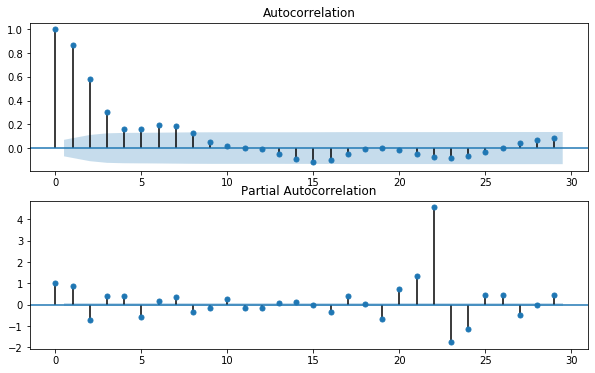

In [24]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(data_trans.gdp, ax=ax[0])
ax[1] = plot_pacf(data_trans.gdp, ax=ax[1])

In [72]:
for var in data:
    sTest.ADF_Stationarity_Test(data_trans[var])
    print("Is {} series stationary? {}".format(var, sTest.isStationary))
    print('\n')

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -5.091592
P-Value                 0.000015
# Lags                 16.000000
# Observations        775.000000
Critical Value 5%      -2.865277
dtype: float64
Is tbill series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic   -7.295564e+00
P-Value               1.380922e-10
# Lags                2.100000e+01
# Observations        7.700000e+02
Critical Value 5%    -2.865301e+00
dtype: float64
Is dtoe series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic   -7.140535e+00
P-Value               3.333211e-10
# Lags                1.500000e+01
# Observations        7.760000e+02
Critical Value 5%    -2.865272e+00
dtype: float64
Is pinvest series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic   -6.065194e+00
P-Value               1.186409e-07
# Lags                1.800000e+01
# Observations        7.730000e+02
Critical Value 5%    -2.865286e+00
dtype: 

#### Setting Up Test Parameters

In [73]:
x_train_6, x_test_6 = data_trans[0:-6], data_trans[-6:]
x_train_12, x_test_12 = data_trans[0:-12], data_trans[-12:]
x_train_24, x_test_24 = data_trans[0:-24], data_trans[-24:]

x_train_6.tail()

,tbill,dtoe,pinvest,gdp
date,,,,
2018-06-01,1.01,0.002360,0.012570,0.002533
2018-07-01,0.93,-0.007316,0.010619,0.001749
2018-08-01,0.86,0.089680,0.004368,0.000911
2018-09-01,0.87,0.058445,0.001349,0.000673
2018-10-01,0.90,0.042755,0.001673,0.001125


In [27]:
maxlag = 6
test = 'ssr_chi2test'
def grangerstest(data, variables, test='ssr_chi2test', verbose=False):
    x_train = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in data_trans.columns:
        for r in x_train.index:
            res = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(res[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X={c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            x_train.loc[r, c] = min_p_value
    x_train.columns = [var + '_x' for var in variables]
    x_train.index = [var + '_y' for var in variables]
    return x_train

gct = grangerstest(x_train_6, variables=x_train_6.columns)

Granger causality test assumes there is no relationship between the lag value of x(row) and present value of y(column), if resultant p value is greater than 0.05.

The heat map below tells us that past DTOE has no causal relationship with present TBILL, and past GDP has no causal relationship with present DTOE.

But since the interest is on GDP, we see that past TBILL, DTOE, PINVEST all have p values less than 0.05, meaning they all have some causal relationship with GDP.

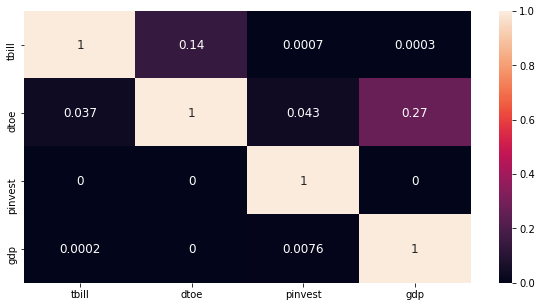

In [28]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(gct, xticklabels=x_train_6.columns.values, yticklabels=data.columns.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Cointegreation Test

Although it is determined the variables have causal relationship, it does not mean they are cointegrated. Cointegration relation is a sort of reverse p-value test, whereas in a univariate regression, whether an input variable has statistically significant impact on the decision variable is revealed at the end, conducting cointegration test allows us understand, then refine the model, either via dimension selection or further transformation.

Cointegration is simply that, if by applying a transformation variable, or by lagging one variable against another (order of integration), the distance between variables is stationary throughout time.

Johansen test combines two series together, than tests whether this combined series has less order of integration than a single variable on its own. If so, then the variables are cointegrated.

Here we pass in 3 variables:
1. data,
2. -1 for stochastic nature of the data,
3. 6 number of lagged periods

In [86]:
def cointegration_test(data, significance=0.05):
    out = coint_johansen(x_train_6, -1, 6)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-significance)]]
    
    res = pd.DataFrame('Name', 'Test Stat', 'C(95%)', 'Signif')
    res
    return res
#     def adjust(val, length=6): return str(val).ljust(length)
#     print('Name   ::  Test Stat  >  C(95%)    => Signif  \n', '--'*20)
#     for col, trace, cvt in zip(x_train_6.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace, 2), 9), '> ', adjust(cvt, 8), ' => ', trace > cvt)

cointegration_test(x_train_6)

Name   ::  Test Stat  >  C(95%)    => Signif  
 ----------------------------------------
tbill  ::  243.78    >  40.1749   =>  True
dtoe   ::  96.67     >  24.2761   =>  True
pinvest ::  25.21     >  12.3212   =>  True
gdp    ::  4.31      >  4.1296    =>  True


#### VAR Model

Schwarz Criterion (BIC), the Akaike Criterion (AIC), Final Prediction Error (FPE), Hannan–Quinn information criterion (HQIC)

In [30]:
model = VAR(x_train_6)
for i in range(1, 25):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC =', result.aic)
    print('BIC =', result.bic)
    print('FPE =', result.fpe)
    print('HQIC =', result.hqic, '\n')

Lag Order = 1
AIC = -32.82280758881778
BIC = -32.70393666607173
FPE = 5.562065294804302e-15
HQIC = -32.777101982107844 

Lag Order = 2
AIC = -34.07799970734692
BIC = -33.86381766049409
FPE = 1.585311189291149e-15
HQIC = -33.995642242803434 

Lag Order = 3
AIC = -34.55010369788785
BIC = -34.24041927874159
FPE = 9.887486782988694e-16
HQIC = -34.43101642602533 

Lag Order = 4
AIC = -35.30376592363992
BIC = -34.89838725054902
FPE = 4.653515560873407e-16
HQIC = -35.14787063053511 

Lag Order = 5
AIC = -35.796462913360166
BIC = -35.29519746830698
FPE = 2.843257602802542e-16
HQIC = -35.603681119425964 

Lag Order = 6
AIC = -35.89710925145419
BIC = -35.299763877135774
FPE = 2.5711161203838183e-16
HQIC = -35.66736221020638 

Lag Order = 7
AIC = -36.30577880842838
BIC = -35.61215970532054
FPE = 1.708678684011542e-16
HQIC = -36.03898750524506 

Lag Order = 8
AIC = -36.4418524835664
BIC = -35.65176520697058
FPE = 1.4913961993463031e-16
HQIC = -36.13793763444017 

Lag Order = 9
AIC = -36.4648657810

/home/chrx/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


 -36.570869705373426
BIC = -35.19785354293088
FPE = 1.3120209484055059e-16
HQIC = -36.042533371751375 

Lag Order = 15
AIC = -36.58707532721076
BIC = -35.11621156177697
FPE = 1.2912513869461632e-16
HQIC = -36.02105281042176 

Lag Order = 16
AIC = -36.591466374535145
BIC = -35.022555291599545
FPE = 1.2859607780917374e-16
HQIC = -35.98767618967094 

Lag Order = 17
AIC = -36.63686201641249
BIC = -34.969703228917616
FPE = 1.229288059808588e-16
HQIC = -35.99522239761113 

Lag Order = 18
AIC = -36.65531057964891
BIC = -34.88970302485839
FPE = 1.2072602054709668e-16
HQIC = -35.97573947877085 

Lag Order = 19
AIC = -36.65680616280939
BIC = -34.792548099157344
FPE = 1.2059526539644892e-16
HQIC = -35.93922124810576 

Lag Order = 20
AIC = -36.66004920865852
BIC = -34.69693821258026
FPE = 1.202600989224564e-16
HQIC = -35.90436786343139 

Lag Order = 21
AIC = -36.67516941807179
BIC = -34.613002380815544
FPE = 1.1851595254991053e-16
HQIC = -35.88130873932638 

Lag Order = 22
AIC = -36.65362433321429

In [31]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2019
Time:                     18:39:31
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -35.2998
Nobs:                     780.000    HQIC:                  -35.6674
Log likelihood:           9672.78    FPE:                2.57112e-16
AIC:                     -35.8971    Det(Omega_mle):     2.26630e-16
--------------------------------------------------------------------
Results for equation tbill
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.126035         0.028597            4.407           0.000
L1.tbill           1.251323         0.036290           34.481           0.000
L1.dtoe            0.133638         0.461243            0.290           

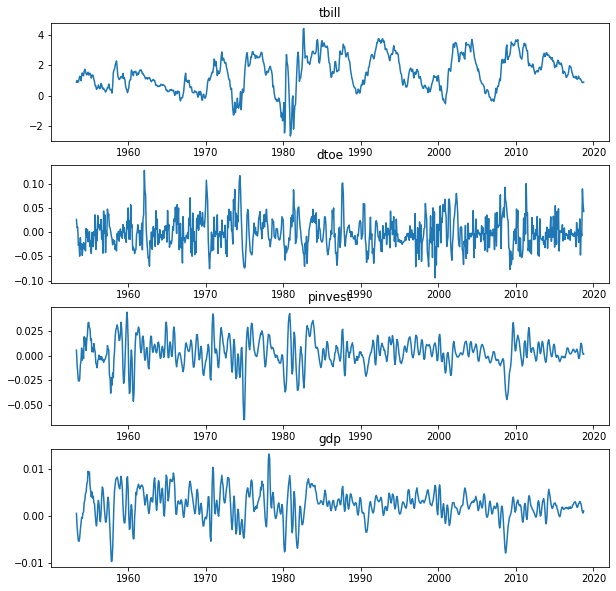

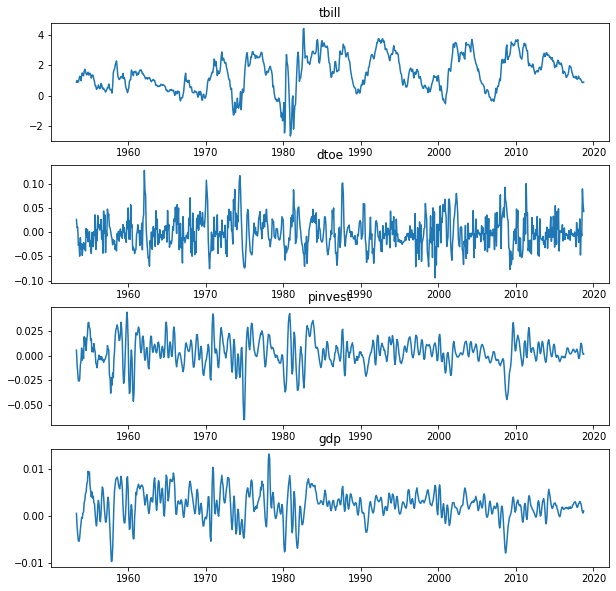

In [32]:
model_fitted.plot()

#### Durbin Watson Test

Durbin Watson explaination

In [33]:
for col, val in zip(x_train_6.columns, durbin_watson(model_fitted.resid)):
    print((col), ':', round(val, 2))

tbill : 2.01
dtoe : 1.93
pinvest : 2.03
gdp : 2.06


#### Forecasting GDP

In [34]:
lag_order = model_fitted.k_ar
print(lag_order)

forecast_input = x_train_6.values[-lag_order:]
forecast_input

6


array([[ 1.12000000e+00, -4.71631609e-02,  8.94509065e-03,
         2.92859180e-03],
       [ 1.01000000e+00,  2.36006360e-03,  1.25703813e-02,
         2.53262187e-03],
       [ 9.30000000e-01, -7.31629983e-03,  1.06192917e-02,
         1.74920693e-03],
       [ 8.60000000e-01,  8.96801266e-02,  4.36793681e-03,
         9.11343130e-04],
       [ 8.70000000e-01,  5.84452659e-02,  1.34940735e-03,
         6.73205920e-04],
       [ 9.00000000e-01,  4.27546509e-02,  1.67282627e-03,
         1.12510379e-03]])

In [35]:
fc = model_fitted.forecast(y=forecast_input, steps=6)
df_forecast = pd.DataFrame(fc, index=x_train_6.index[-6:], columns=x_train_6.columns)
df_forecast

,tbill,dtoe,pinvest,gdp
date,,,,
2018-05-01,0.899141,0.006057,0.003844,0.001700
2018-06-01,0.923307,-0.000172,0.003285,0.001808
2018-07-01,0.993364,0.011235,-0.001002,0.001308
2018-08-01,1.134671,-0.002797,-0.007422,0.000554
2018-09-01,1.261508,-0.001650,-0.011490,0.000185
2018-10-01,1.350340,-0.020369,-0.010777,0.000488


#### Inverting Transformation

In [36]:
def invert_trans(data, df_forecast, diff=False):
    df_fc = df_forecast.deepcopy()
    columns = x_train_6.columns
    for col in columns:
        df_fc[str(col) + '_forecast'] = x_train_6[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc

df_res = invert_trans(x_train_6, df_forecast, diff=True)
df_res.loc[:, 'gdp']

AttributeError: 'DataFrame' object has no attribute 'deepcopy'

In [ ]:
predictions = np.expm1(df_res)
predictions['tbill]

## Findings

## Limitations

This predictor does not pinpoint the cause of a recession, but makes a general comment about the state of the economy. The underlying assumption is that these inputs are efficient enough to reflect long term market conditions, but inefficient enough to price in the short term fluctuations in GDP.

When trying to quantify debt as percentage of equity, it turned out that noncoporate entities 

## Closing Thoughts

Special thanks to Mortada Mehyar for creating fredapi. This saves some time from having to deal with JSON format.

## Part 2

#### Data Preparation

Let's set up recession decision variable. Difficulty joining series, so had to convert to list, append, then reconvert to series.

In [ ]:
# Create a DataFrame for recession
start_date = pd.to_datetime('1951, 10, 1')
end_date = pd.to_datetime('today')
recessions = pd.date_range(start_date, end_date, freq='MS')
recessions = recessions.to_frame().reset_index()

# Mark recession months as 1, non-recession months as 0
recessions.iloc[:,1] = 0
recessions.loc[recessions.iloc[:,0].isin(recession_months), 0] = 1
recessions.rename(columns={'index':'date', 0:'recession'}, inplace=True)

# possible to create lambda variables?

r_1953 = pd.Series(pd.date_range(pd.to_datetime('1953, 3, 1'), pd.to_datetime('1954, 5, 1'))).tolist()
r_1957 = pd.Series(pd.date_range(pd.to_datetime('1957, 8, 1'), pd.to_datetime('1958, 4, 1'))).tolist()
r_1960 = pd.Series(pd.date_range(pd.to_datetime('1960, 4, 1'), pd.to_datetime('1961, 2, 1'))).tolist()
r_1962 = pd.Series(pd.date_range(pd.to_datetime('1969, 12, 1'), pd.to_datetime('1970, 11, 1'))).tolist()
r_1973 = pd.Series(pd.date_range(pd.to_datetime('1973, 11, 1'), pd.to_datetime('1975, 3, 1'))).tolist()
r_1980 = pd.Series(pd.date_range(pd.to_datetime('1980, 1, 1'), pd.to_datetime('1980, 7, 1'))).tolist()
r_1981 = pd.Series(pd.date_range(pd.to_datetime('1981, 7, 1'), pd.to_datetime('1982, 11, 1'))).tolist()
r_1990 = pd.Series(pd.date_range(pd.to_datetime('1990, 7, 1'), pd.to_datetime('1991, 3, 1'))).tolist()
r_2001 = pd.Series(pd.date_range(pd.to_datetime('2001, 3, 1'), pd.to_datetime('2001, 11, 1'))).tolist()
r_2007 = pd.Series(pd.date_range(pd.to_datetime('2007, 12, 1'), pd.to_datetime('2009, 6, 1'))).tolist()

print('Original series length:', len(r_1953))

recession_months = pd.Series(r_1953 + r_1957 + r_1960 + r_1962 + r_1973 + r_1980 + r_1981 + r_1990 + r_2001 + r_2007)

print('Verify series was appended:', len(recession_months))

recessions.iloc[15:20]